### From scratch


#### A neuron


In [1]:
inputs = [1,2,3]
weights = [0.2,0.8, -0.5]

## Every unique neuron has a unique bias
bias = 2

output = sum([inputs[i] * weights[i] for i in range(len(inputs)) ] )+ bias

output

2.3

#### layer

In [2]:
inputs = [1,2,3,2.5]

weights1 = [0.2, 0.8, -0.5, 1.0]
weights2 = [0.5, -0.91, 0.26, -0.5]
weights3 = [-0.26, -0.27, 0.17, 0.87]



bias1 = 2
bias2 = 3
bias3 = 0.5

output = [ sum([inputs[i] * weights1[i] for i in range(len(inputs)) ] )+ bias1,
         sum([inputs[i] * weights2[i] for i in range(len(inputs)) ] )+ bias2,
         sum([inputs[i] * weights3[i] for i in range(len(inputs)) ] )+ bias3 ]

output

[4.8, 1.21, 2.385]

#### Dot prodcut

In [3]:
inputs = [1,2,3,2.5]

weights = [
    [0.2, 0.8, -0.5, 1.0],
    [0.5, -0.91, 0.26, -0.5],
     [-0.26, -0.27, 0.17, 0.87]   
]

bias = [ 2,3, 0.5 ]


#Output of the Current layer
layer_outputs = []
for neuron_weights, neuron_bias in zip(weights, bias ):
    neuron_output = 0 # Output of given neuron
    for n_input, weight in zip( inputs, neuron_weights ):
        neuron_output += n_input * weight
    neuron_output += neuron_bias
    layer_outputs.append(neuron_output)

print(layer_outputs)


[4.8, 1.21, 2.385]


In [4]:
# Using Numpy

import numpy as np
inputs = [1,2,3,2.5]
weights = [0.2,0.8,-0.5,1.0]
bias = 2

output = np.dot(weights,inputs) + bias

print(output)

4.8


In [5]:
inputs = [1,2,3,2.5]

weights = [
    [0.2, 0.8, -0.5, 1.0],
    [0.5, -0.91, 0.26, -0.5],
     [-0.26, -0.27, 0.17, 0.87]   
]

biases = [ 2,3, 0.5 ]

output = np.dot(weights, inputs) + biases

output


array([4.8  , 1.21 , 2.385])

### Batches, Layers and Objects

In [6]:
inputs = [[1,2,3,2.5],
         [2.0,5.0,-1.0,2.0],
          [-1.5,2.7,3.3,-0.8]
         ]

weights = [
    [0.2, 0.8, -0.5, 1.0],
    [0.5, -0.91, 0.26, -0.5],
     [-0.26, -0.27, 0.17, 0.87]   
]

biases = [ 2,3, 0.5 ]
# Transpose used here
# shapes (3,4) and (3,4) not aligned: 4 (dim 1) != 3 (dim 0)
output = np.dot(inputs,np.array( weights ).T) + biases

print(output)

[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]


In [7]:
inputs = [[1,2,3,2.5],
         [2.0,5.0,-1.0,2.0],
          [-1.5,2.7,3.3,-0.8]
         ]
# having a set of weights is known as layer here2
weights = [
    [0.2, 0.8, -0.5, 1.0],
    [0.5, -0.91, 0.26, -0.5],
     [-0.26, -0.27, 0.17, 0.87]   
]

biases = [ 2, 3, 0.5 ]

weights2 = [
    [0.1, -0.14, 0.50],
    [-0.5,0.12, -0.33],
     [-0.44, 0.73, -0.13 ]   
]

biases2 = [ -1, 2, -0.5 ]

layer1_outputs = np.dot( inputs, np.array( weights ).T ) + biases

#print(layer1_outputs)

layer2_outputs = np.dot(layer1_outputs, np.array( weights2 ).T) + biases2

print(layer2_outputs)

[[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


In [8]:
import numpy as np

np.random.seed(0)

X = [[1,2,3,2.5],
      [ 2.0,5.0,-1.0,2.0],
      [-1.5,2.7,3.3,-0.8]
    ]

# what is dead network
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons ):
        self.weights = .10 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1,n_neurons))
    def forward(self, inputs ):
        self.output = np.dot(inputs, self.weights ) + self.biases

layer1 = Layer_Dense(4,5)
layer1.forward(X)
# print(layer1.output)

layer2 = Layer_Dense(5, 2)
layer2.forward(layer1.output)

print(layer2.output)
# print(.10 * np.random.randn(4, 3))

[[ 0.148296   -0.08397602]
 [ 0.14100315 -0.01340469]
 [ 0.20124979 -0.07290616]]



#### Terminology Alert

What Is a "Dead Network"?
The comment # what is dead network might refer to the concept of "dead neurons" or a "dead network" in deep learning. In that context:

Dead Neurons: Neurons that never activate (e.g., always output zero) due to poor initialization or because the activation function saturates (common with ReLU, where a neuron might output 0 for all inputs). This means that the neuron doesn't contribute to learning.
Dead Network: Sometimes used informally to describe a neural network that, for example, isn't training effectively or where many neurons are inactive, thus failing to learn useful representations.
In your code, the error isn't about dead neurons; it's simply that you haven't triggered the forward pass which computes the output.

By calling layer1.forward(X), you'll see the computed output, and you'll avoid the AttributeError.

#### Hidden LAyer Activation Functions

here


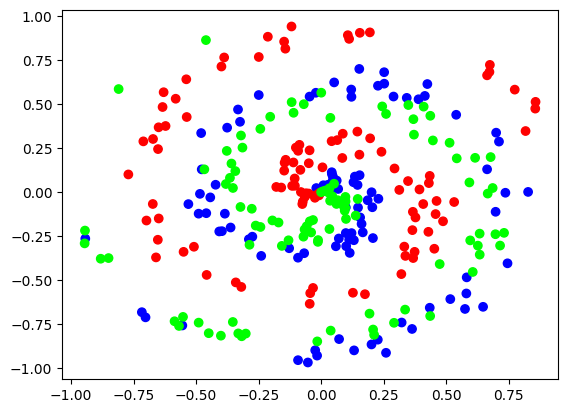

In [9]:
# datset
# https://cs231n.github.io/neural-networks-case-study/
def spiral_data(points, classes):
    X = np.zeros((points*classes, 2))
    y = np.zeros(points*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0, 1, points)  # radius
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    return X, y

import matplotlib.pyplot as plt
print("here")
X, y = spiral_data(100,3)

plt.scatter(X[:,0], X[:,1], c = y, cmap = "brg")
plt.show()

In [10]:
import numpy as np

np.random.seed(0)

X = [[1,2,3,2.5],
      [ 2.0,5.0,-1.0,2.0],
      [-1.5,2.7,3.3,-0.8]
    ]

X, y = spiral_data(100,3)

# inputs = [ 0,2,-1,3.3, -2.7, 1.1, 2.2, -100]
# output = []

# for i in inputs:
#     output.append(max(0, i))

# print(output)

class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)



layer1 = Layer_Dense(2, 5)

activation1 = Activation_ReLU()

layer1.forward(X)
activation1.forward(layer1.output)

print(activation1.output)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.65504526e-04
  4.56845892e-05]
 [0.00000000e+00 5.93467943e-05 0.00000000e+00 2.03573189e-04
  6.10024276e-04]
 ...
 [1.13291515e-01 0.00000000e+00 0.00000000e+00 8.11079627e-02
  0.00000000e+00]
 [1.34588354e-01 0.00000000e+00 3.09493973e-02 5.66337522e-02
  0.00000000e+00]
 [1.07817915e-01 0.00000000e+00 0.00000000e+00 8.72561871e-02
  0.00000000e+00]]


#### Softmax Activation

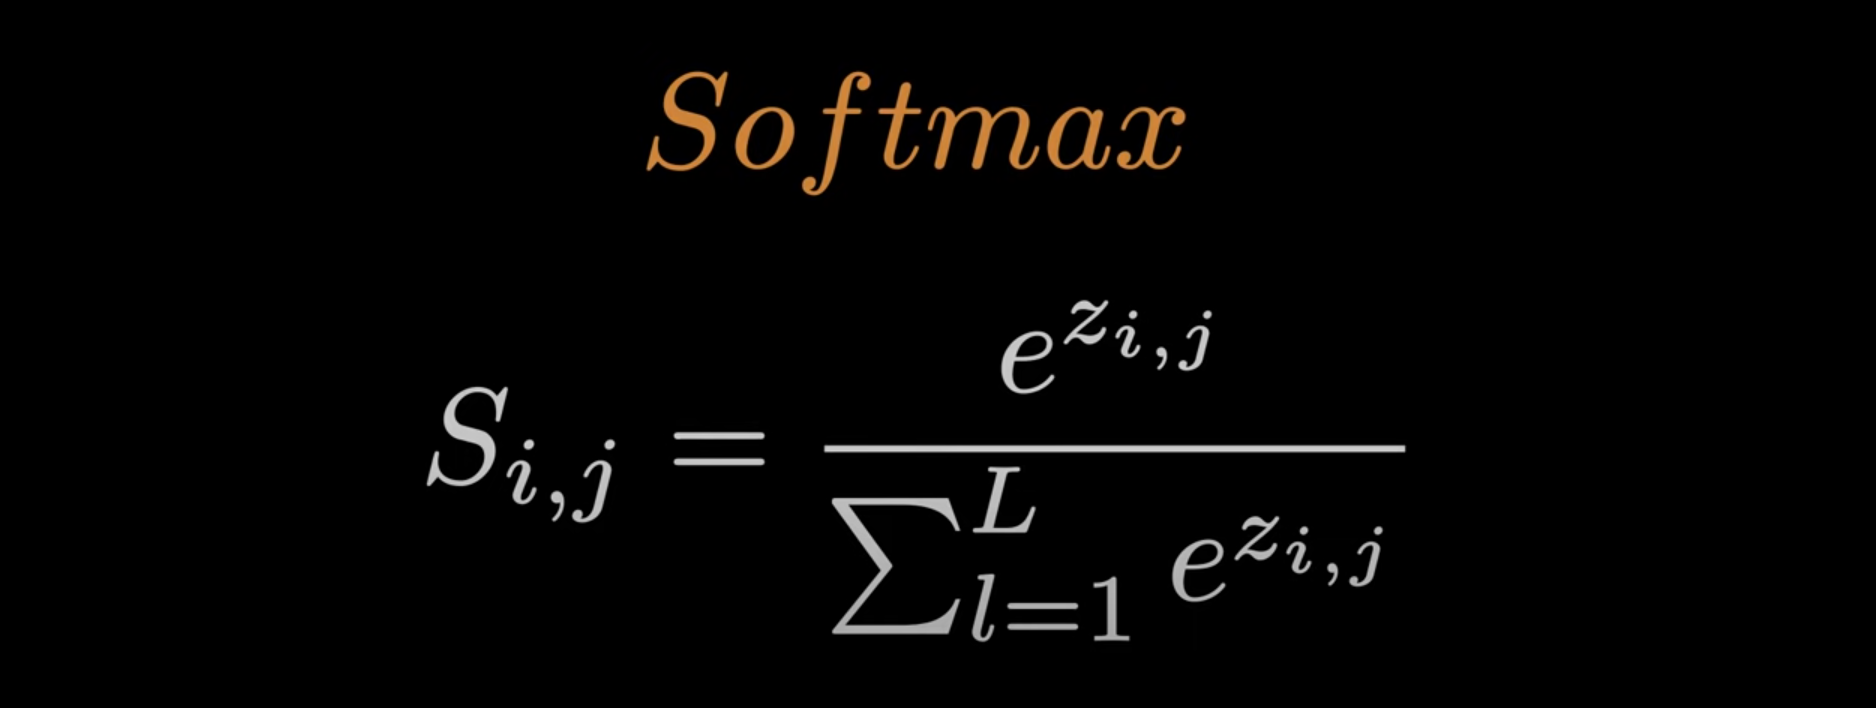

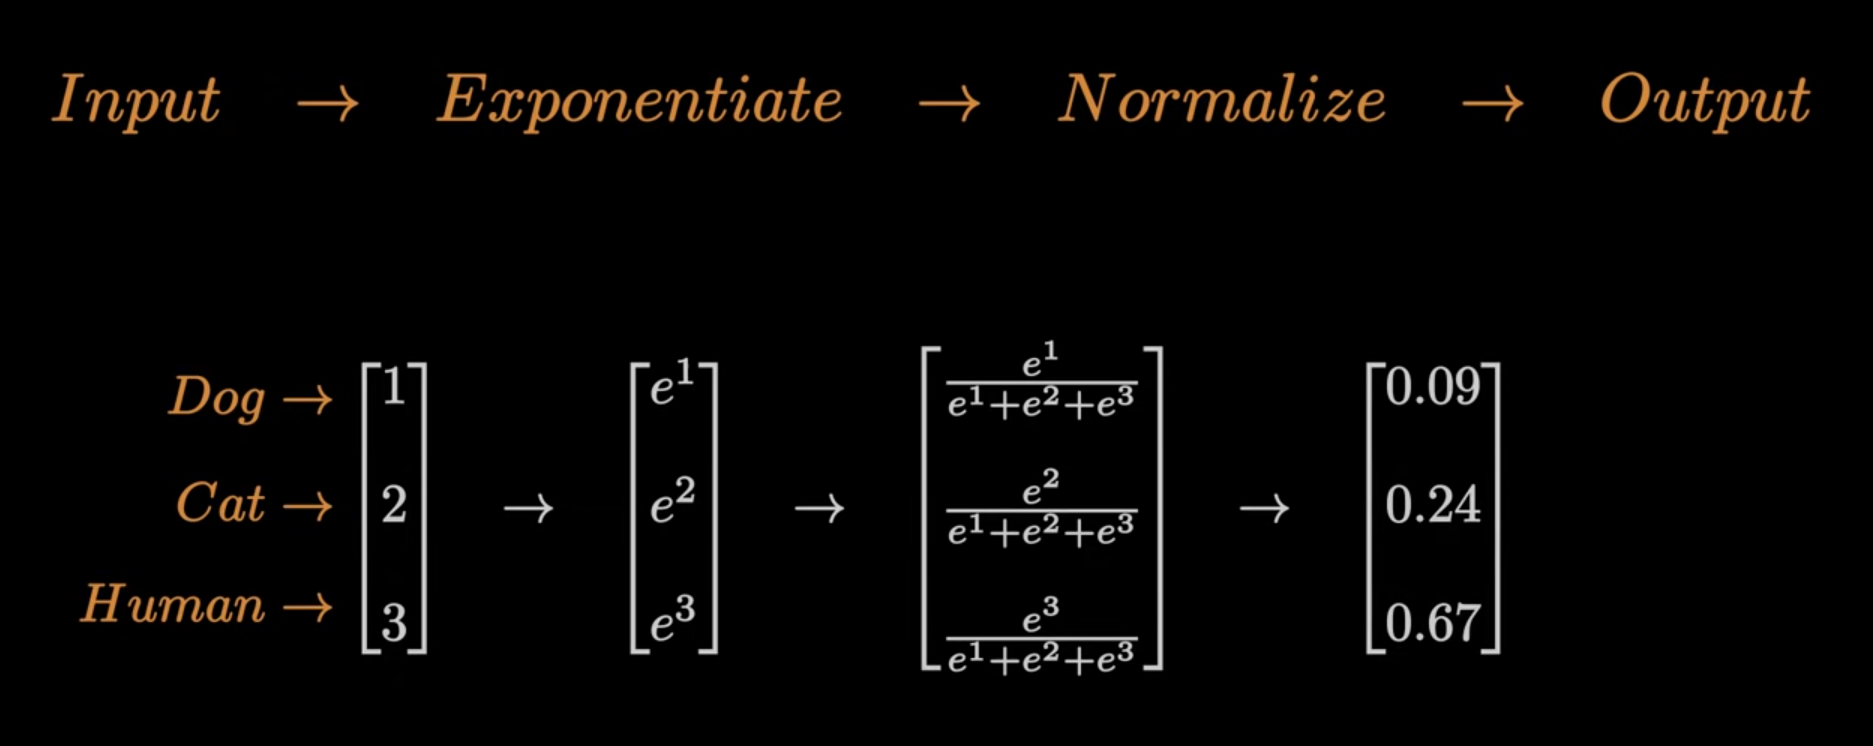

In [11]:
import math

layer_outputs = [4.8,1.21,2.385]
# E = 2.71828182846
E = math.e

exp_values = []
for output in layer_outputs:
    exp_values.append(E**output)

print(exp_values)
# normalization
norm_base = sum(exp_values)
norm_values = []

for value in exp_values:
    norm_values.append(value / norm_base)
print(norm_values)
print(sum(norm_values))

[121.51041751873483, 3.353484652549023, 10.859062664920513]
[0.8952826639572619, 0.024708306782099374, 0.0800090292606387]
0.9999999999999999


In [12]:
import math
import numpy as np

layer_outputs = [4.8,1.21,2.385]
# E = 2.71828182846
E = math.e

exp_values = np.exp(layer_outputs)


print(exp_values)
# normalization

norm_values = exp_values / np.sum(exp_values)

print(norm_values)
print(sum(norm_values))

[121.51041752   3.35348465  10.85906266]
[0.89528266 0.02470831 0.08000903]
0.9999999999999999


In [13]:
import numpy as np

layer_outputs = [[4.8, 1.21,2.385],
                [8.9, -1.81,0.2],
                [1.41, 1.051,0.026]]

# print(np.sum(layer_outputs, axis = 1, keepdims = True))
exp_values = np.exp(layer_outputs)

# normalization
norm_values = exp_values / np.sum(exp_values, axis = 1, keepdims = True)


print(norm_values)
# print(sum(norm_values))

[[8.95282664e-01 2.47083068e-02 8.00090293e-02]
 [9.99811129e-01 2.23163963e-05 1.66554348e-04]
 [5.13097164e-01 3.58333899e-01 1.28568936e-01]]


### at the stage of find exp , it might be oveflow to avoid that find the local maximum or maximum of the each matrix then subtract every element with that matrix from marix

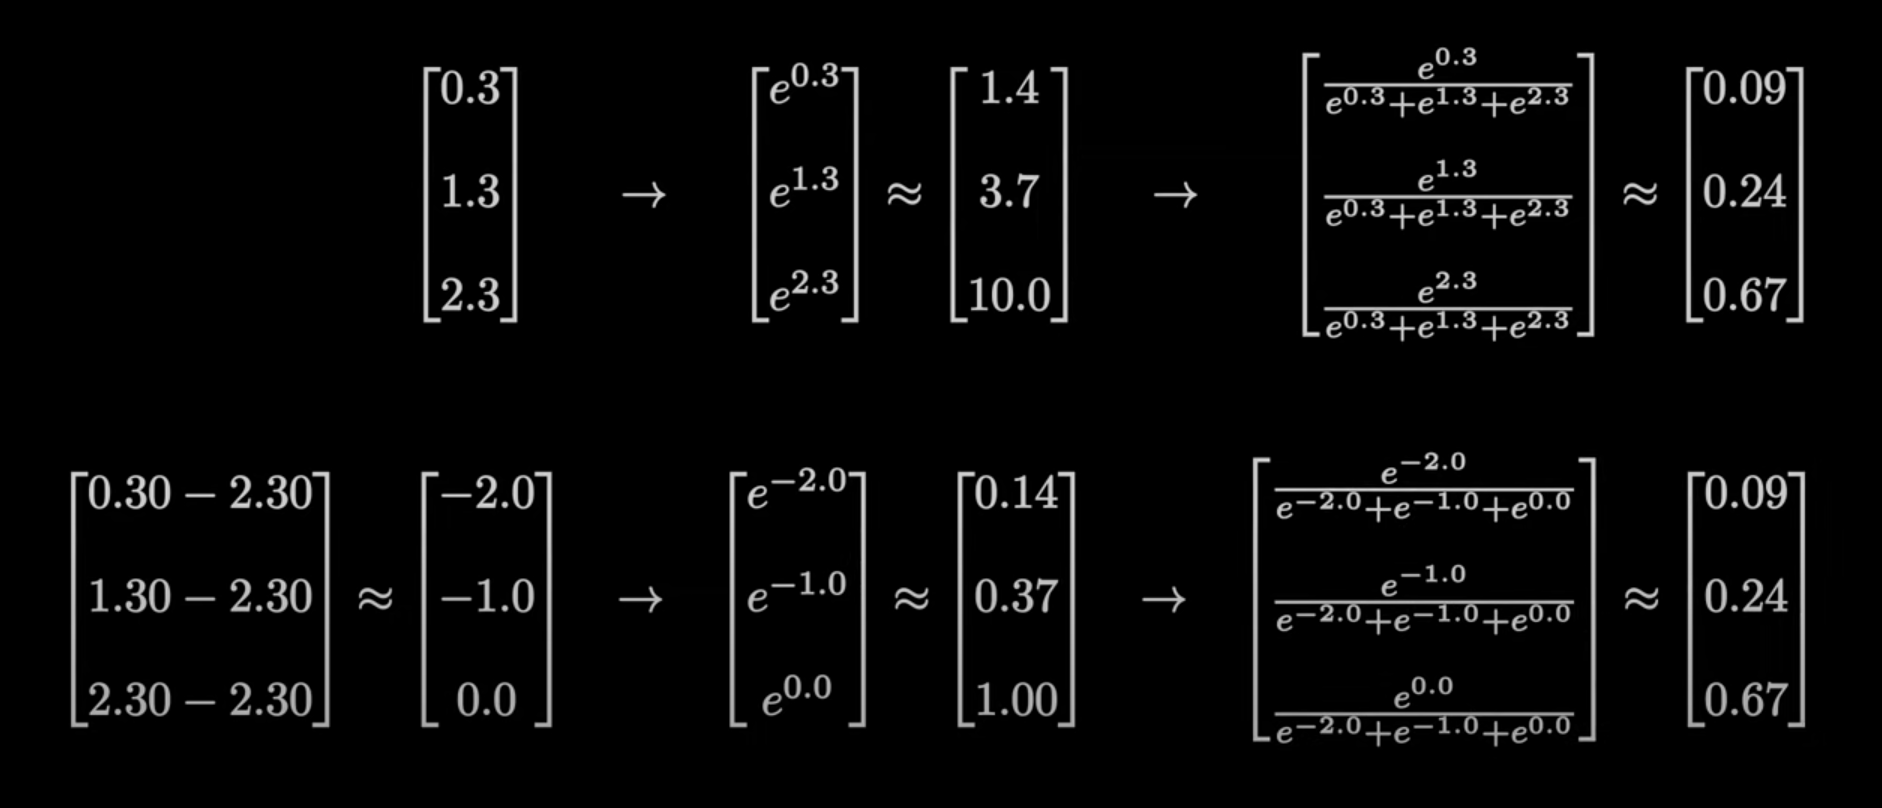


In [14]:
class Activation_softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis = 1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities

X, y = spiral_data(100, 3)

dense1 = Layer_Dense(2,3)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3,3)
activation2 = Activation_softmax()

dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
# print(dense2.output[:5])
activation2.forward(dense2.output)

print(activation2.output[:5])

[[0.33333333 0.33333333 0.33333333]
 [0.3333351  0.33333329 0.33333161]
 [0.33327101 0.33333011 0.33339888]
 [0.33329674 0.33330456 0.3333987 ]
 [0.33331198 0.33331375 0.33337426]]


In [15]:
b = 5.2

print(np.log(b))

print(E ** 1.6486586255873816)

1.6486586255873816
5.199999999999999


In [16]:
import math

softmax_output = [0.7,0.1,0.2]
target_output = [1,0, 0]

loss = -( math.log(softmax_output[0])*target_output[0] +
          math.log(softmax_output[1])*target_output[1] + 
          math.log(softmax_output[2])*target_output[2] )

print(loss)

0.35667494393873245


In [17]:

softmax_outputs = np.array([[0.7,0.1,0.2],
                            [0.1,0.5,0.4],
                            [0.02,0.9,0.08]
                           ])

class_targets = [0,1,1]

# print(softmax_outputs[[0,1,2],class_targets])
print(softmax_outputs[range(len(softmax_outputs)),class_targets])

# to get the loss 
neg_loss = -np.log(softmax_outputs[range(len(softmax_outputs)), class_targets])

avg_loss = np.mean(neg_loss)
print(avg_loss)

[0.7 0.5 0.9]
0.38506088005216804


In [18]:
class Loss:
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss

class Loss_CategoricalCrossentropy(Loss):
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)

        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples), y_true]
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped*y_true, axis = 1)

        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods



X, y = spiral_data(100, 3)

dense1 = Layer_Dense(2,3)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3,3)
activation2 = Activation_softmax()

dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
# print(dense2.output[:5])
activation2.forward(dense2.output)

# print(activation2.output[:5])

loss_function = Loss_CategoricalCrossentropy()
loss = loss_function.calculate(activation2.output, y)

predictions = np.argmax(activation2.output, axis = 1)

acc = np.mean( predictions == y)
print("accuracy :", acc)

print(loss)

accuracy : 0.2733333333333333
1.0989270164784897


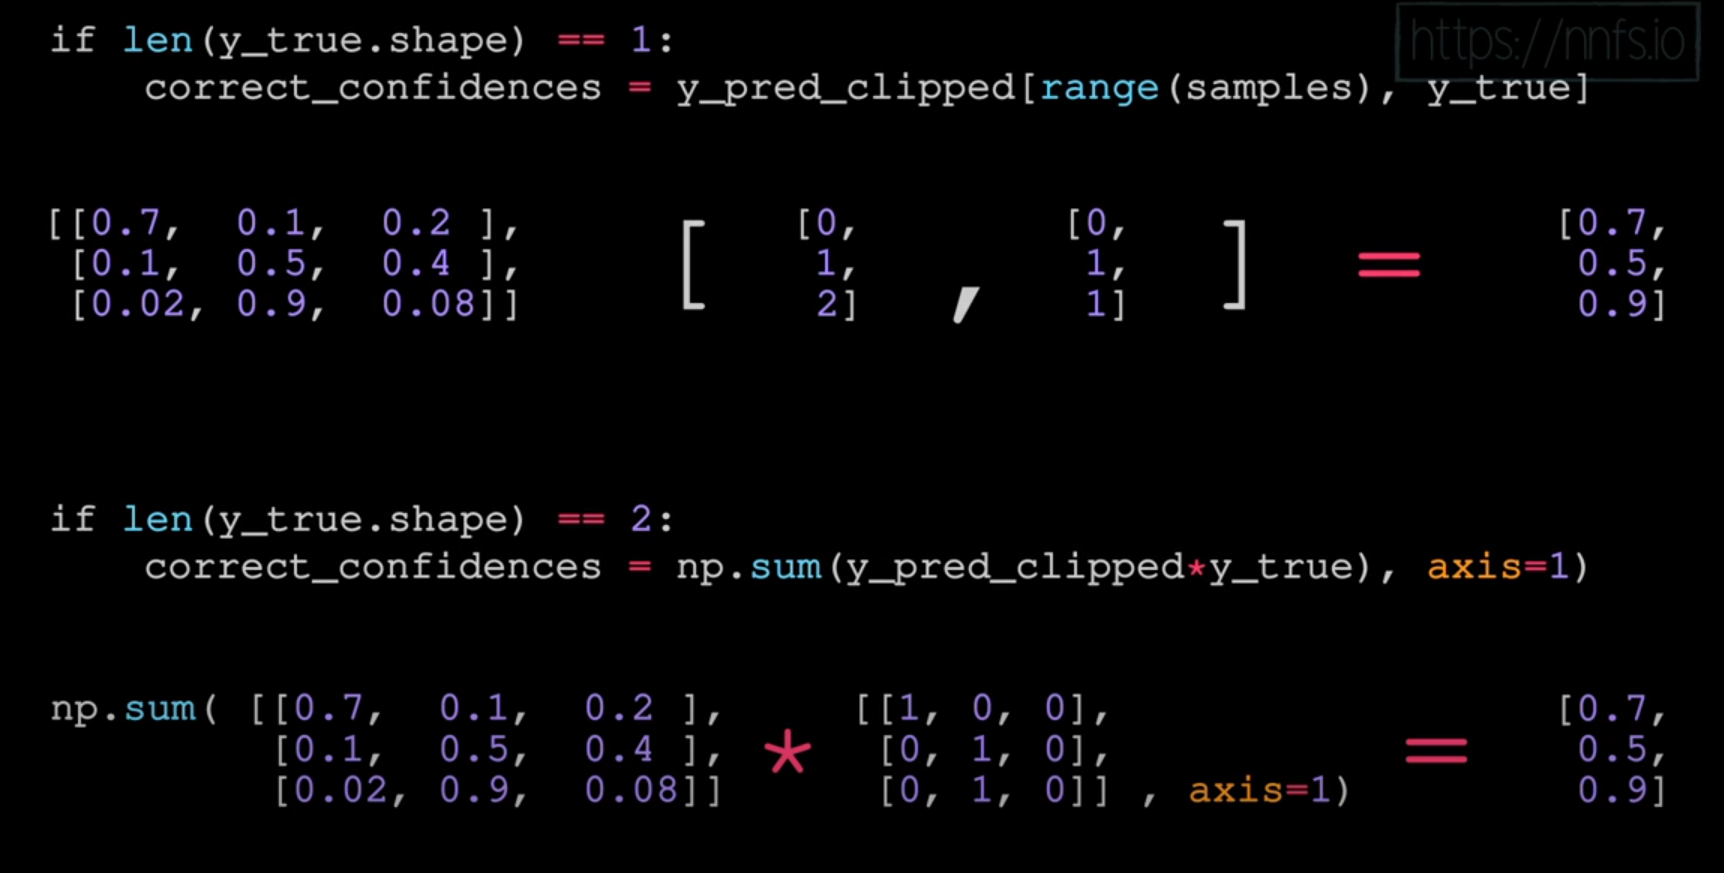

#### update on the Code

In [24]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.1 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
        self.inputs = inputs  # Store inputs for backprop
        self.output = np.dot(inputs, self.weights) + self.biases

    def backward(self, dvalues):
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        self.dinputs = np.dot(dvalues, self.weights.T)


class Activation_ReLU:
    def forward(self, inputs):
        self.inputs = inputs  
        self.output = np.maximum(0, inputs)

    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs <= 0] = 0  # Derivative of ReLU


class Activation_Softmax:
    def forward(self, inputs):
        self.inputs = inputs  
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        self.output = exp_values / np.sum(exp_values, axis=1, keepdims=True)

    def backward(self, dvalues):
        self.dinputs = np.empty_like(dvalues)  # Placeholder for gradients
        for index, (single_output, single_dvalues) in enumerate(zip(self.output, dvalues)):
            single_output = single_output.reshape(-1, 1)
            jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T)
            self.dinputs[index] = np.dot(jacobian_matrix, single_dvalues)

class Loss_CategoricalCrossentropy:
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        correct_confidences = np.sum(y_pred_clipped * y_true, axis=1)
        return -np.log(correct_confidences)

    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        labels = len(dvalues[0])
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]
        self.dinputs = -y_true / dvalues
        self.dinputs = self.dinputs / samples

In [25]:
# Create dataset
X, y = spiral_data(100, 3)

# One-hot encode labels
y_true = np.eye(3)[y]

# Initialize layers and activations
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()
loss_function = Loss_CategoricalCrossentropy()

# Forward pass
dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)

# Compute loss
loss = np.mean(loss_function.forward(activation2.output, y_true))
print("Loss:", loss)

# Backward pass
loss_function.backward(activation2.output, y_true)
activation2.backward(loss_function.dinputs)
dense2.backward(activation2.dinputs)
activation1.backward(dense2.dinputs)
dense1.backward(activation1.dinputs)

# Print gradients
print("Gradients for Dense Layer 1:")
print("Weights:", dense1.dweights)
print("Biases:", dense1.dbiases)

Loss: 1.098323321166494
Gradients for Dense Layer 1:
Weights: [[-0.00142747 -0.0004905  -0.00177909]
 [ 0.00211226 -0.00272516 -0.00048283]]
Biases: [[-0.00010785 -0.00704715  0.00470669]]


In [26]:
class Optimizer_GD:
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate

    def update_params(self, layer):
        # Update weights and biases using gradients
        layer.weights -= self.learning_rate * layer.dweights
        layer.biases -= self.learning_rate * layer.dbiases

In [51]:
# Create dataset
X, y = spiral_data(100, 3)

# One-hot encode labels
y_true = np.eye(3)[y]

# Create model layers and activations
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

# Create loss function
loss_function = Loss_CategoricalCrossentropy()

# Create optimizer
optimizer = Optimizer_GD(learning_rate=0.01)
    
    # # Compute loss
    # loss = loss_function.forward(activation2.output, y_true)
    
    # # Compute accuracy
    # predictions = np.argmax(activation2.output, axis=1)
    # accuracy = np.mean(predictions == y)
        

# Training loop
for epoch in range(10001):  # Train for 10,000 epochs
    # Forward pass
    dense1.forward(X)
    activation1.forward(dense1.output)
    
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    
    # Compute loss
    loss = loss_function.forward(activation2.output, y_true)
    # print("Loss shape:", loss.shape)
    loss = np.mean(loss)  # Aggregate the loss into a single scalar
    
    # Compute accuracy
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions == y)
    
    # Print statistics every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss:.3f}, Accuracy: {accuracy:.3f}')
    
    # Backward pass
    loss_function.backward(activation2.output, y_true)
    activation2.backward(loss_function.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)
    
    # Update weights and biases
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)


Epoch 0, Loss: 1.099, Accuracy: 0.293
Epoch 100, Loss: 1.099, Accuracy: 0.320
Epoch 200, Loss: 1.099, Accuracy: 0.283
Epoch 300, Loss: 1.099, Accuracy: 0.303
Epoch 400, Loss: 1.099, Accuracy: 0.337
Epoch 500, Loss: 1.099, Accuracy: 0.363
Epoch 600, Loss: 1.099, Accuracy: 0.357
Epoch 700, Loss: 1.099, Accuracy: 0.367
Epoch 800, Loss: 1.098, Accuracy: 0.383
Epoch 900, Loss: 1.098, Accuracy: 0.390
Epoch 1000, Loss: 1.098, Accuracy: 0.400
Epoch 1100, Loss: 1.098, Accuracy: 0.393
Epoch 1200, Loss: 1.098, Accuracy: 0.393
Epoch 1300, Loss: 1.098, Accuracy: 0.393
Epoch 1400, Loss: 1.098, Accuracy: 0.403
Epoch 1500, Loss: 1.098, Accuracy: 0.397
Epoch 1600, Loss: 1.098, Accuracy: 0.400
Epoch 1700, Loss: 1.097, Accuracy: 0.397
Epoch 1800, Loss: 1.097, Accuracy: 0.410
Epoch 1900, Loss: 1.097, Accuracy: 0.420
Epoch 2000, Loss: 1.097, Accuracy: 0.417
Epoch 2100, Loss: 1.097, Accuracy: 0.413
Epoch 2200, Loss: 1.097, Accuracy: 0.407
Epoch 2300, Loss: 1.096, Accuracy: 0.410
Epoch 2400, Loss: 1.096, Acc